In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [3]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
 # Merge transaction data with customer data
data = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending per customer
    "TransactionID": "count",  # Number of transactions
    "Quantity": "sum"  # Total quantity purchased
}).reset_index()

In [5]:
# Merge with customer profile data
data = data.merge(customers, on="CustomerID", how="left")

# Convert categorical variables into numerical (one-hot encoding for 'Region')
data = pd.get_dummies(data, columns=["Region"], drop_first=True)

In [6]:
# Drop unnecessary columns
data.drop(["CustomerID", "CustomerName", "SignupDate"], axis=1, inplace=True)


In [7]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [14]:
# Apply K-Means clustering
optimal_clusters = 3  # You can change this based on elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data["Cluster"] = clusters

In [15]:
# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 1.1989


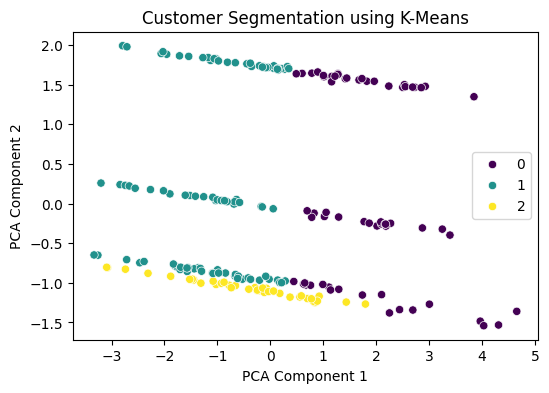

In [21]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(6,4))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=clusters, palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation using K-Means")
plt.show()

In [ ]:
Deliverables
*Number of Clusters: 3
*DB Index Value: 1.1989
*Visual Representation: PCA-based 2D scatter plot